<a href="https://colab.research.google.com/github/alouwyck/vives-intro-to-ai/blob/main/topic5/topic5b_blind_search_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

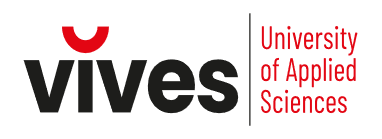<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
VIVES BUSINESS ACADEMY<br>
Academic Year 2023-2024<br>
Andy Louwyck

---



---



# **BLIND SEARCH 2**

This notebook demonstrates how to apply **non-deterministic search** (NDS) and **iterative deepening search** (IDS) to solve the problem of **finding a path**. These algorithms also blindly traverse the search tree without using any "intelligence", just like depth-first search (DFS) and breadth-first search (BFS); hence, the name **blind search**. This also explains why these algorithms are not considered as artificial intelligence. The use of more advanced search algorithms will be covered in the next topics.

## `SearchExerciser`

To illustrate the basic concepts discussed in the topics about search algorithms, we will use the `SearchExerciser` package developed by Stefaan Haspeslagh and Andy Louwyck at Vives University of Applied Sciences. The package can be downloaded or cloned from the following GitHub repository: https://github.com/alouwyck/SearchExerciser.

To clone the repository, we execute the statements in the cell below. Note that [Google Colab](https://colab.research.google.com/) is used as environment to run the notebooks, although this is not required.

In [ ]:
import os, shutil

# remove directory 'SearchExerciser' first if it already exists
path = "SearchExerciser"
if os.path.exists(path):
    shutil.rmtree(path)

# clone SearchExerciser repository from Github
!git clone https://github.com/alouwyck/SearchExerciser

# put SearchExerciser package directory in the current working directory
os.rename(path, 'temp')
shutil.copytree(os.path.join('temp', path), path);
shutil.rmtree('temp')

Cloning into 'SearchExerciser'...
remote: Enumerating objects: 281, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 281 (delta 20), reused 25 (delta 12), pack-reused 248
Receiving objects: 100% (281/281), 349.00 KiB | 10.58 MiB/s, done.
Resolving deltas: 100% (168/168), done.


Once the package is cloned into our environment, we import the following classes:

In [ ]:
from SearchExerciser.graph import Graph
from SearchExerciser.maze import Maze
from SearchExerciser.search.blind import NDS, IDS

We are already familiar with classes `Graph` and `Maze`. How to use classes `NDS` and `IDS` will be explained in the sections below.

## The running example

The `Graph` object created in the cell below defines the graph from the running example used in the slides:

In [ ]:
graph = Graph.create(edges=[("S", "A"), ("S", "D"), ("A", "D"), ("A", "B"), ("D", "E"),
                            ("B", "E"), ("B", "C"), ("E", "F"), ("F", "G")])

As we've already seen, calling method `plot` on object `graph` visualizes the graph:

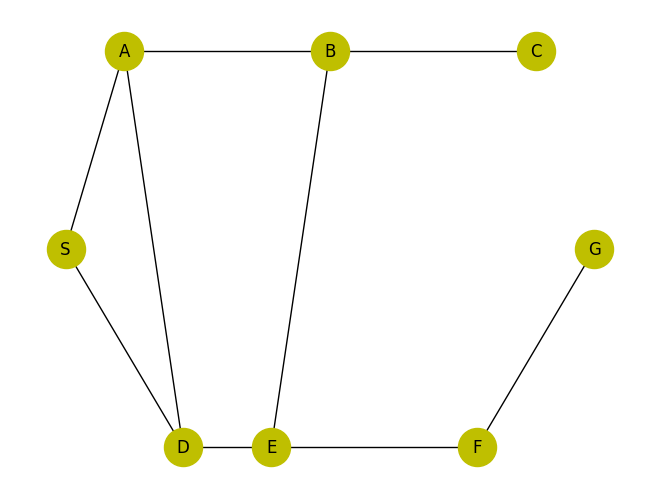

In [ ]:
coordinates = dict(S=[0, 0.5],
                   A=[1, 1],
                   D=[2, 0],
                   E=[3.5, 0],
                   B=[4.5, 1],
                   F=[7, 0],
                   C=[8, 1],
                   G=[9, 0.5])
graph.plot(coordinates)

## Non-deterministic search

Applying depth-first search and breadth-first search, we are not searching the tree in an intelligent way, but at least, we are going through the nodes in a very systematic way. Non-deterministic search doesn't do neither of the two, as it searches the tree **randomly**! The term 'non-deterministic' actually indicates that the result is not determined beforehand. So, everytime you perform the algorithm, it will give another result (at least, if there are many solutions).

At first sight, that doesn't sound like a good idea, but in fact, adding some randomness to the algorithm may enhance its performance. Especially if the problem to solve is so large it is very hard or even impossible to find an exact optimal solution. In that case, we may decide to use a non-determistic algorithm that is very fast and gives us a solution that is probably suboptimal yet good enough for the problem at hand.

A well-known and frequently applied algorithm that uses randomness is **stochastic gradient descent** (SGD). The term 'stochastic' means 'having a random probability distribution'. Thus SGD is also non-determinstic. Why is SGD an important algorithm in AI? Well, SGD and its variants are used to train neural networks, which are indeed too large to solve exactly in most cases!

But how do we include "randomness" in these algorithms? Indeed, by using **random numbers**. Programming languages have **random number generators** available for that purpose. In Python, for instance, the random functions are implemented in module `random`. Or if you use NumPy, then there is the equivalent module `numpy.random`.

But these random numbers are not actually random. No, they are **pseudo random**. As a consequence, we can initialize the **seed** of the random generator in order to get the same sequence of "random" numbers over and over again. This is very useful when we are debugging an algorithm, or if we are illustrating how an algorithm works. By setting the seed, we are sure the code always gives the same result. However, if we are solving real-life problems and training machine learning models, we may never set the random seed!

An example to illustrate how `random` works in Python. Suppose we want to generate a random number between 1 and 10, then we may use function `random.randint`:

In [ ]:
import random

for _ in range(10):
    n = random.randint(1, 10)  # bounds 1 and 10 are included!
    print(n, end=' ')

7 6 10 4 9 8 8 9 5 1 

If we want to get the same sequence everytime we run the code, then we need to set the `seed`:

In [ ]:
random.seed(0)  # setting seed will always generate the same sequence
for _ in range(10):
    n = random.randint(1, 10)
    print(n, end=' ')

7 7 1 5 9 8 7 5 8 6 

Re-run both cells several times and you'll see the output of the first cell is never the same, while the output of the second is always the same!

To find a path for our graph problem using non-deterministic search, we simply pass class `NDS` to method `search`:

In [ ]:
path = graph.search(NDS)  # NDS is the class implementing non-deterministic search
print('Path found:', path)

ALGORITHM: Non-deterministic search
RESULT: SUCCES
Elapsed time: 0.00116729736328125 seconds
Number of iterations: 8
Maximum length of queue: 7
Path found: SADEFG


If you re-run the code, you'll notice the number of iterations changes each time, although it is possible the solution remains the same. That is because there are only a limited number of solutions.

Do you want to get the same result over and over again? Well, as class `NDS` makes use of module `random`, you have to initialize `random.seed`!

In [ ]:
random.seed(0)
path = graph.search(NDS)  # NDS is the class implementing non-deterministic search
print('Path found:', path)

ALGORITHM: Non-deterministic search
RESULT: SUCCES
Elapsed time: 0.0019042491912841797 seconds
Number of iterations: 11
Maximum length of queue: 7
Path found: SDEFG


Is it advantageous to use non-determinstic search? As explained at the beginning of this section, it could be if the search tree of the problem is huge. By searching this tree randomly, we may be lucky and find a path very quickly... and who knows, maybe we are so lucky it is the shortest path! But as we will see in the subsequent topics, there are more intelligent ways to search the tree... By the way, the algorithm discussed in the next section is also a better choice in most cases.

## Iterative deepening search

Iterative deepening combines depth-first search and breadth-first search in a way it adopts the advantages of both. Recall that depth-first search is the better choice looking at memory usage, while breadth-first search is the better choice in terms of speed. Moreover, breadth-first search always finds the shortest path.

As its name suggests, iterative deepening iteratively applies depth-first search, while limiting the depth of the search. In the first iteration, it applies depth-first search and limits the depth to level 1, in the second iteration, the depth is limited to level 2, etc. In this way, it searches the tree level-by-level, just like breadth-first search does. Therefore, iterative deepening will always find the shortest path, and its speed is similar to that of breadth-first search. Actually, there is a little overhead due to the iterations it goes through, but that is amply compensated by its more efficient memory usage, which is similar to that of depth-first search!

To find the shortest path using iterative deeping for the graph we created, we need to pass class `NDS` to the `search` method. In this case, it is very interesting to display the intermediate results and see how the algorithm indeed applies DFS iteratively:

In [ ]:
path = graph.search(IDS, print_queue=True)  # class NDS implements iterative deepening search
print('Path found:', path)

--> DEPTH: 1
Initial queue:
[S]

ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.0006973743438720703 seconds
Number of iterations: 1
Maximum length of queue: 1

--> DEPTH: 2
Initial queue:
[S]

Iteration 1
Path removed from queue:
S
New paths:
[SA,SD]
Paths in queue:
[SA,SD]

ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.009885549545288086 seconds
Number of iterations: 3
Maximum length of queue: 2

--> DEPTH: 3
Initial queue:
[S]

Iteration 1
Path removed from queue:
S
New paths:
[SA,SD]
Paths in queue:
[SA,SD]

Iteration 2
Path removed from queue:
SA
New paths:
[SAB,SAD]
Paths in queue:
[SAB,SAD,SD]

Iteration 5
Path removed from queue:
SD
New paths:
[SDA,SDE]
Paths in queue:
[SDA,SDE]

ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.003409147262573242 seconds
Number of iterations: 7
Maximum length of queue: 3

--> DEPTH: 4
Initial queue:
[S]

Iteration 1
Path removed from queue:
S
New paths:
[SA,SD]
Paths in queue:
[SA,SD]

Iteration 2
Path

Ok, it finds the shortest path, indeed. But it doesn't seem like a more efficient algorithm than the other blind search algorithms. Well, for this unrealistically small example, it is not indeed. Nevertheless, iterative deepening is the best choice in most cases, and it actually is the only blind search algorithm that can be applied efficiently to solve some real-life problems.

## Maze

Of course NDS and IDS can also be applied to find a path in a maze. Let's try this out on the simple 3x3 maze we've discussed previously:

In [ ]:
maze = Maze.create(["*..",
                    ".#.",
                    "..o"])
maze

*..
.#.
..o

Recall that the maze is visualized calling method `plot`:

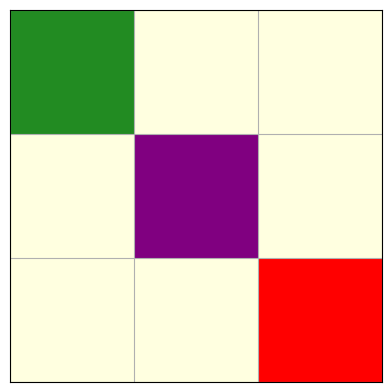

In [ ]:
maze.plot()

As you already know, class `Maze` also has a `search` method. Let's try NDS first:

In [ ]:
path = maze.search(NDS)

ALGORITHM: Non-deterministic search
RESULT: SUCCES
Elapsed time: 0.001893758773803711 seconds
Number of iterations: 5
Maximum length of queue: 2


Recall that we can visualize the maze and the found path by calling method `plot` on the `Path` object:

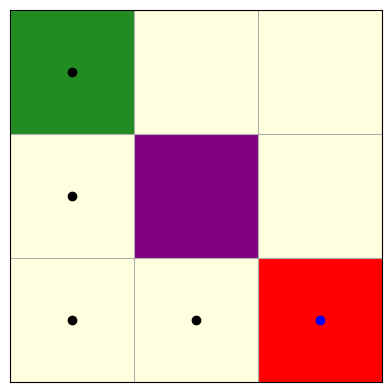

In [ ]:
path.plot()

Now let's apply iterative deepening:

In [ ]:
path = maze.search(IDS, print_queue=True)

--> DEPTH: 1
Initial queue:
x..  
.#.  
..o  

ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.0017309188842773438 seconds
Number of iterations: 1
Maximum length of queue: 1

--> DEPTH: 2
Initial queue:
x..  
.#.  
..o  

Iteration 1
Path removed from queue:
x..
.#.
..o
New paths:
xx.  x..  
.#.  x#.  
..o  ..o  
Paths in queue:
xx.  x..  
.#.  x#.  
..o  ..o  

ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.001214742660522461 seconds
Number of iterations: 3
Maximum length of queue: 2

--> DEPTH: 3
Initial queue:
x..  
.#.  
..o  

Iteration 1
Path removed from queue:
x..
.#.
..o
New paths:
xx.  x..  
.#.  x#.  
..o  ..o  
Paths in queue:
xx.  x..  
.#.  x#.  
..o  ..o  

Iteration 2
Path removed from queue:
xx.
.#.
..o
New paths:
xxx  
.#.  
..o  
Paths in queue:
xxx  x..  
.#.  x#.  
..o  ..o  

Iteration 4
Path removed from queue:
x..
x#.
..o
New paths:
x..  
x#.  
x.o  
Paths in queue:
x..  
x#.  
x.o  

ALGORITHM: Depth-first search
RESULT: FAILURE
Ela

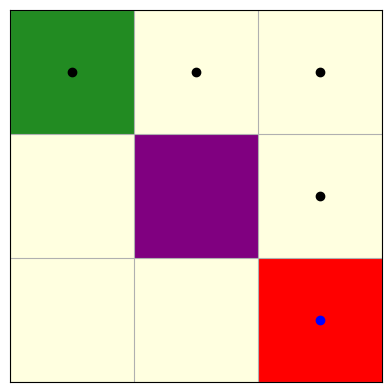

In [ ]:
path.plot()

## Exercise

Recall that we can create a random maze using static method `create_random` of the `Maze` class:

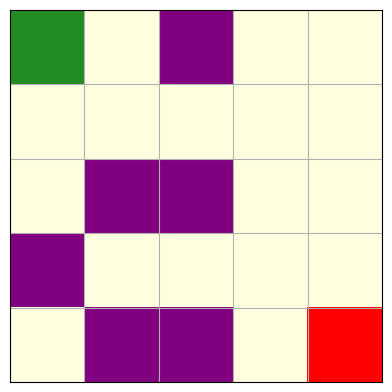

In [ ]:
maze = Maze.create_random(size=5,         # number of rows = number of columns
                          num_of_walls=6, # number of 'forbidden' barriers or walls
                          seed=0)         # random seed
maze.plot()

Try to predict the path that NDS and IDS will find for this maze applying the convential production rules.

Check your solution using method `maze.search`...

---